In [55]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from utils import make_synthetic_binary

In [6]:
plt.rcParams.update({
    "figure.dpi": 120,
    "axes.grid": True,
    "grid.linestyle": ":",
    "grid.alpha": 0.5,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.frameon": False,
})

In [2]:
def plot_univariate_gaussians( mean_a, std_a, mean_b, std_b, sample_size=10000, bins=30):

    X, y = make_synthetic_binary(
        n_samples=10000,
        n_features=1,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42
    )

    class0 = X[y == 0, 0]
    class1 = X[y == 1, 0]

    plt.figure(figsize=(8, 5))
    plt.hist(class0, bins=bins, density=True, alpha=0.6, label=f"Class A (mean={mean_a}, std={std_a})")
    plt.hist(class1, bins=bins, density=True, alpha=0.6, label=f"Class B (mean={mean_b}, std={std_b})")

    plt.xlabel("Feature value")
    plt.ylabel("Density")
    plt.title("Overlapping Univariate Gaussians")
    plt.legend()
    plt.show()

In [3]:
def plot_2d_gaussians(mean_a, std_a, mean_b, std_b, sample_size=10000):


    X, y = make_synthetic_binary(
        n_samples=sample_size,
        n_features=2,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42
    )
    class0 = X[y == 0]
    class1 = X[y == 1]

    plt.figure(figsize=(6, 6))
    plt.scatter(class0[:, 0], class0[:, 1], alpha=0.5, label=f"Class A (mean={mean_a}, std={std_a})", s=10)
    plt.scatter(class1[:, 0], class1[:, 1], alpha=0.5, label=f"Class B (mean={mean_b}, std={std_b})", s=10)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Overlapping 2D Gaussians")
    plt.legend()
    plt.show()

In [4]:

def plot_3d_gaussians(mean_a, std_a, mean_b, std_b, sample_size=10000):
    X, y = make_synthetic_binary(
        n_samples=sample_size,
        n_features=3,
        mean_a=mean_a,
        std_a=std_a,
        mean_b=mean_b,
        std_b=std_b,
        seed=42,
    )

    class0 = X[y == 0]
    class1 = X[y == 1]

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(class0[:, 0], class0[:, 1], class0[:, 2],
               alpha=0.5, s=8, label=f"Class A (mean={mean_a}, std={std_a})")
    ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2],
               alpha=0.5, s=8, label=f"Class B (mean={mean_b}, std={std_b})")

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.set_title("Overlapping 3D Gaussians")
    ax.legend(loc="upper right")

    # optional: make axes roughly equal for a nicer shape
    def _set_equal_3d(ax):
        x_limits = ax.get_xlim3d()
        y_limits = ax.get_ylim3d()
        z_limits = ax.get_zlim3d()
        x_range = x_limits[1] - x_limits[0]
        y_range = y_limits[1] - y_limits[0]
        z_range = z_limits[1] - z_limits[0]
        plot_radius = 0.5 * max(x_range, y_range, z_range)
        x_mid = 0.5 * sum(x_limits)
        y_mid = 0.5 * sum(y_limits)
        z_mid = 0.5 * sum(z_limits)
        ax.set_xlim3d([x_mid - plot_radius, x_mid + plot_radius])
        ax.set_ylim3d([y_mid - plot_radius, y_mid + plot_radius])
        ax.set_zlim3d([z_mid - plot_radius, z_mid + plot_radius])

    _set_equal_3d(ax)
    plt.show()


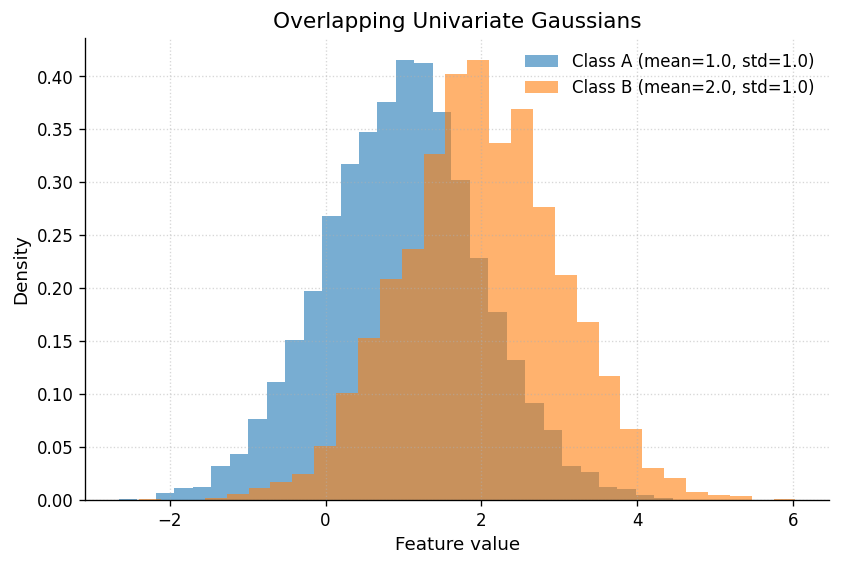

In [7]:
std_a = 1.0
std_b = 1.0

mean_a = 1.0
mean_b = 2.0
plot_univariate_gaussians(mean_a, std_a, mean_b, std_b, bins=30)


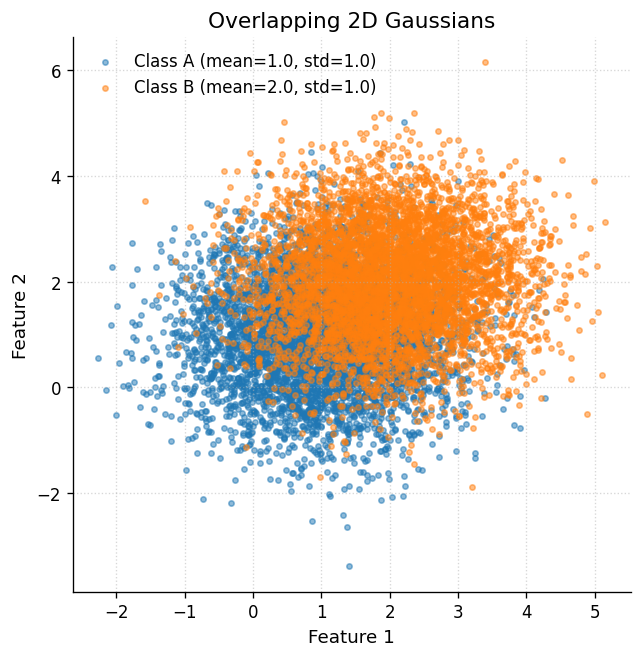

In [8]:
plot_2d_gaussians(mean_a, std_a, mean_b, std_b)

In [ ]:
plot_3d_gaussians(mean_a, std_a, mean_b, std_b)

In [108]:
files = {
    "py cpu 10M": "logs/pyxgboost/cpu_10M_20250921_002154/cpu_benchmark_detailed_times.csv",
    "py gpu 10M": "logs/pyxgboost/gpu_10M_20250920_234748/gpu_benchmark_detailed_times.csv",
    # "h2o cpu 1M": "logs_dev/h2oxgboost/cpu_1M_20250919_152021/cpu_benchmark_detailed_times.csv",
    "h2o gpu 10M": "logs/h2oxgboost/gpu_10M_20250920_233734/gpu_benchmark_detailed_times.csv",
    "h2o cpu 10M": "logs/h2oxgboost/cpu_10M_20250920_225222/cpu_benchmark_detailed_times.csv",
    
}


PALETTE = {
    "py cpu 10M":  "#1f77b4",  # blue
    "py gpu 10M":  "#2ca02c",  # green
    "h2o cpu 10M": "#ff7f0e",  # orange
    "h2o gpu 10M": "#d62728",  # red
}

# Optional: nicer labels for legends
LABELS = {
    "py cpu 10M":  "Native XGBoost CPU",
    "py gpu 10M":  "Native XGBoost GPU",
    "h2o cpu 10M": "H2O.ai XGBoost CPU",
    "h2o gpu 10M": "H2O.ai XGBoost GPU",
}


Y_AXIS_LABELS = {
    "full_train_total_s":  "training time (seconds)",
    "n_boost_per_sec":  "# of boost per second (b/s)",
}

In [112]:
def load_runs(files_dict):
    data = {}
    for name, path in files_dict.items():
        if not os.path.exists(path):
            print(f"Warning: file not found: {path}")
            continue
        df = pd.read_csv(path).tail(100).reset_index()
        # Add run index and condition for easy plotting/aggregation
        df = df.reset_index().rename(columns={"index": "run_id"})
        df["condition"] = name
        data[name] = df
    return data

def plot_line_metric(df, metric, title, rolling_window=5, save=None):
    plt.figure(figsize=(9, 4.8))
    for cond, g in df.groupby("condition"):
        color = PALETTE.get(cond, None)
        label = LABELS.get(cond, cond)
        # Raw line, faint
        plt.plot(g["run_id"], g[metric], lw=1.8, label=label, color=color)
        # Rolling median for readability
        # roll = g[metric].rolling(rolling_window, center=True).median()
        # plt.plot(g["run_id"], roll, lw=2.2, label=label, color=color)
    plt.xlabel("run")
    plt.ylabel(Y_AXIS_LABELS[metric])
    plt.title(title, fontsize=16)
    plt.legend(ncol=2)
    plt.tight_layout()
    if save:
        plt.savefig(save, bbox_inches="tight")
    plt.show()



def plot_hist_grid(df, metric, bins=30, title=None):
    conds = list(files.keys())  # keep your desired order

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid
    axes = axes.flatten()

    for ax, cond in zip(axes, conds):
        vals = pd.to_numeric(
            df.loc[df["condition"] == cond, metric], errors="coerce"
        ).dropna()

        color = PALETTE.get(cond, "#999999")
        label = LABELS.get(cond, cond)

        # Histogram
        ax.hist(
            vals,
            bins=bins,
            density=True,
            histtype="stepfilled",
            alpha=0.35,
            color=color,
        )
        ax.hist(
            vals,
            bins=bins,
            density=True,
            histtype="step",
            linewidth=1.8,
            color=color,
        )

        # Compute statistics
        mean_val = vals.mean()
        median_val = vals.median()
        std_val = vals.std()

        # Annotate stats in the corner of the subplot
        stats_text = f"mean={mean_val:.2f}\nmedian={median_val:.2f}\nstd={std_val:.2f}"
        ax.text(
            0.95, 0.95, stats_text,
            transform=ax.transAxes,
            fontsize=9,
            va="top", ha="right",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )

        ax.set_title(label, fontsize=11)
        ax.set_xlabel(Y_AXIS_LABELS[metric])
        ax.set_ylabel("density")

    fig.suptitle(title or f"{metric} distribution by condition", fontsize=14)
    plt.tight_layout()
    plt.show()



def summarize_stats(df, metric):
    def p95(x):
        return np.percentile(x, 95)
    summary = (
        df.groupby("condition")[metric]
        .agg(["count", "mean", "median", "std", "min", "max"])
        .round(6)
    )
    summary["p95"] = df.groupby("condition")[metric].apply(p95).round(6)
    # Pretty order
    summary = summary.loc[[c for c in files.keys() if c in summary.index]]
    return summary

In [110]:
runs = load_runs(files)
if not runs:
    print("No files loaded. Check paths.")
else:
    df_all = pd.concat(runs.values(), ignore_index=True)

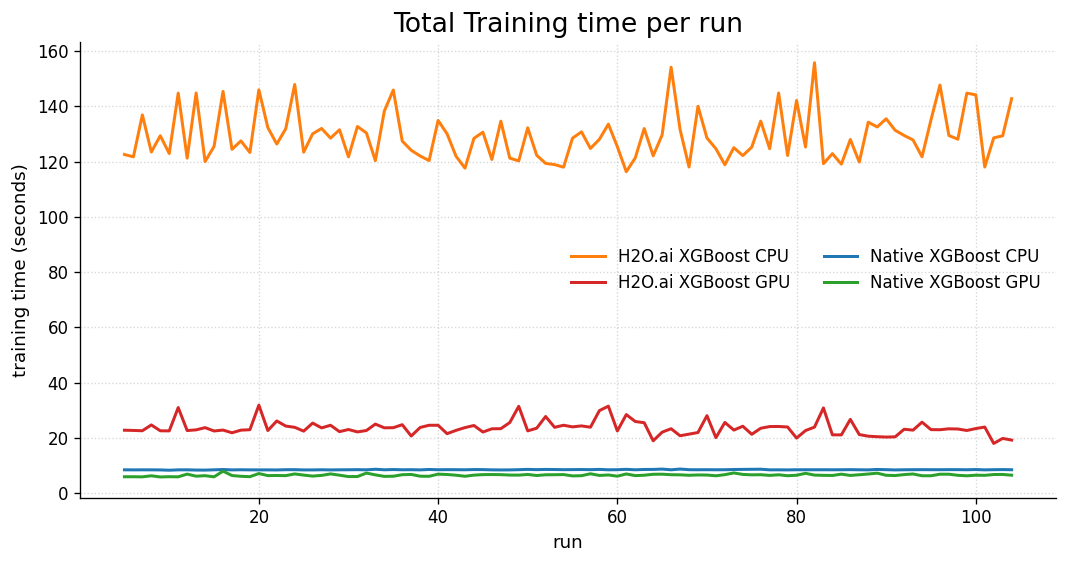

In [111]:
plot_line_metric(df_all, "full_train_total_s", "Total Training time per run")

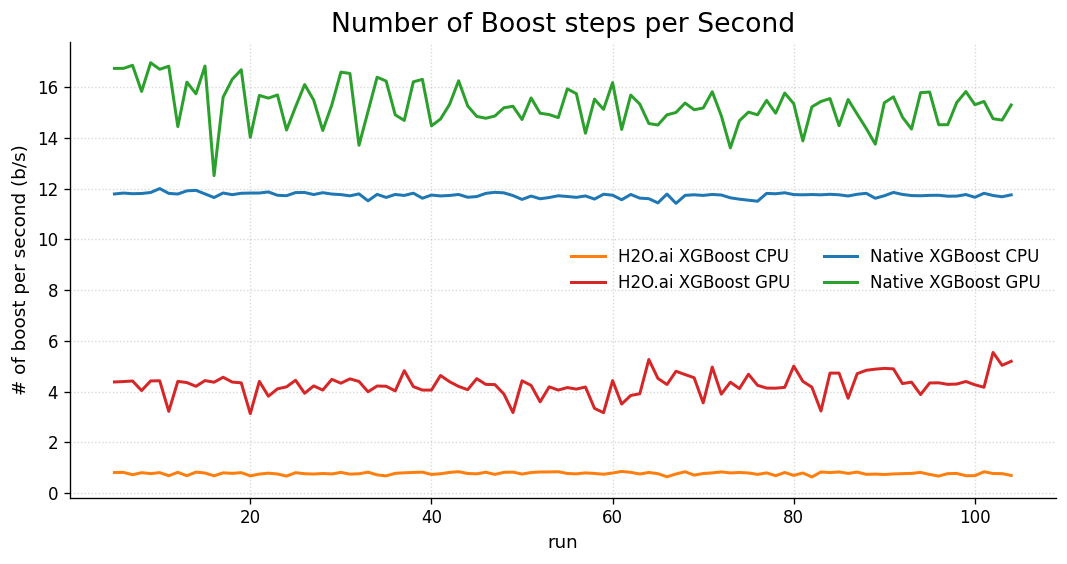

In [121]:
plot_line_metric(df_all, "n_boost_per_sec", "Number of Boost steps per Second")

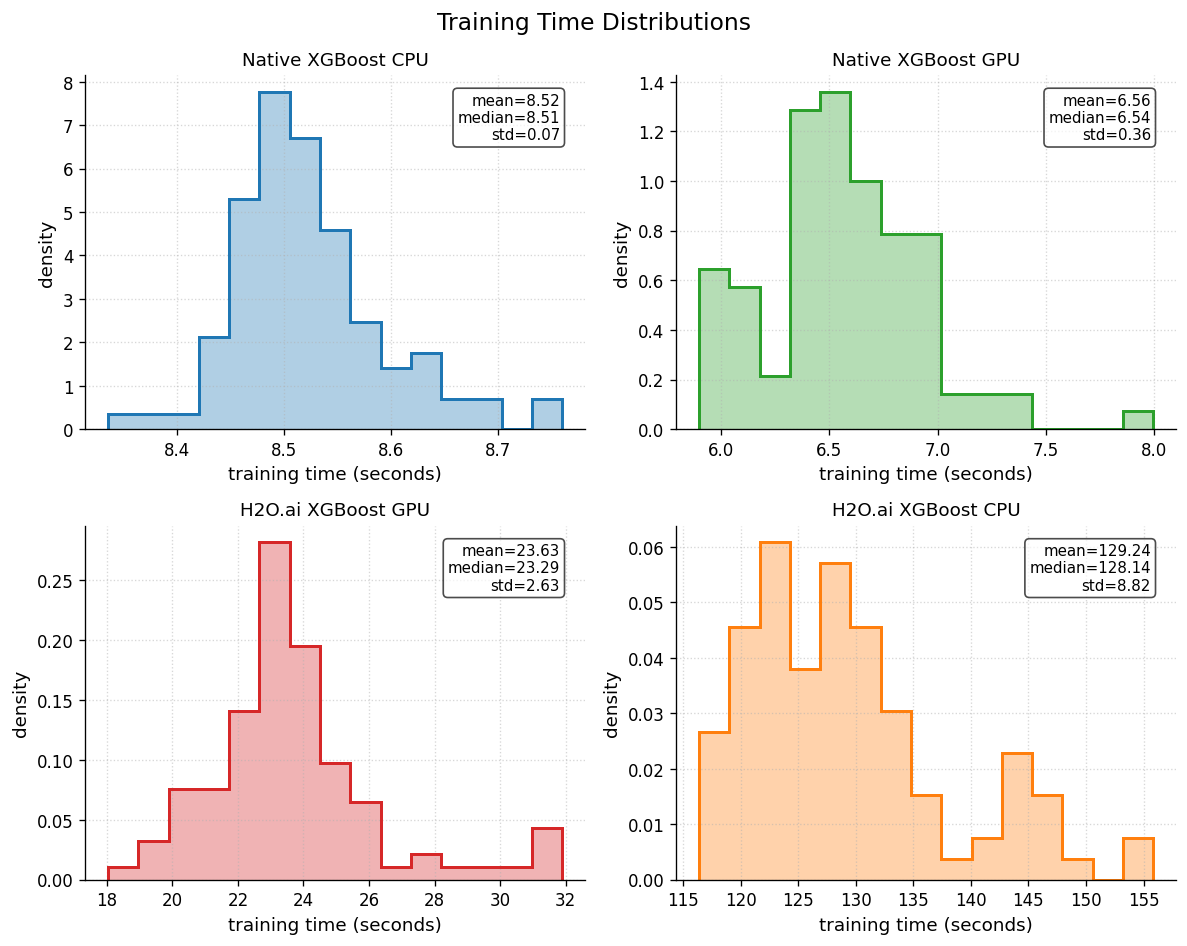

In [122]:
# Example usage:
plot_hist_grid(df_all, "full_train_total_s", bins=15,
                 title="Training Time Distributions")



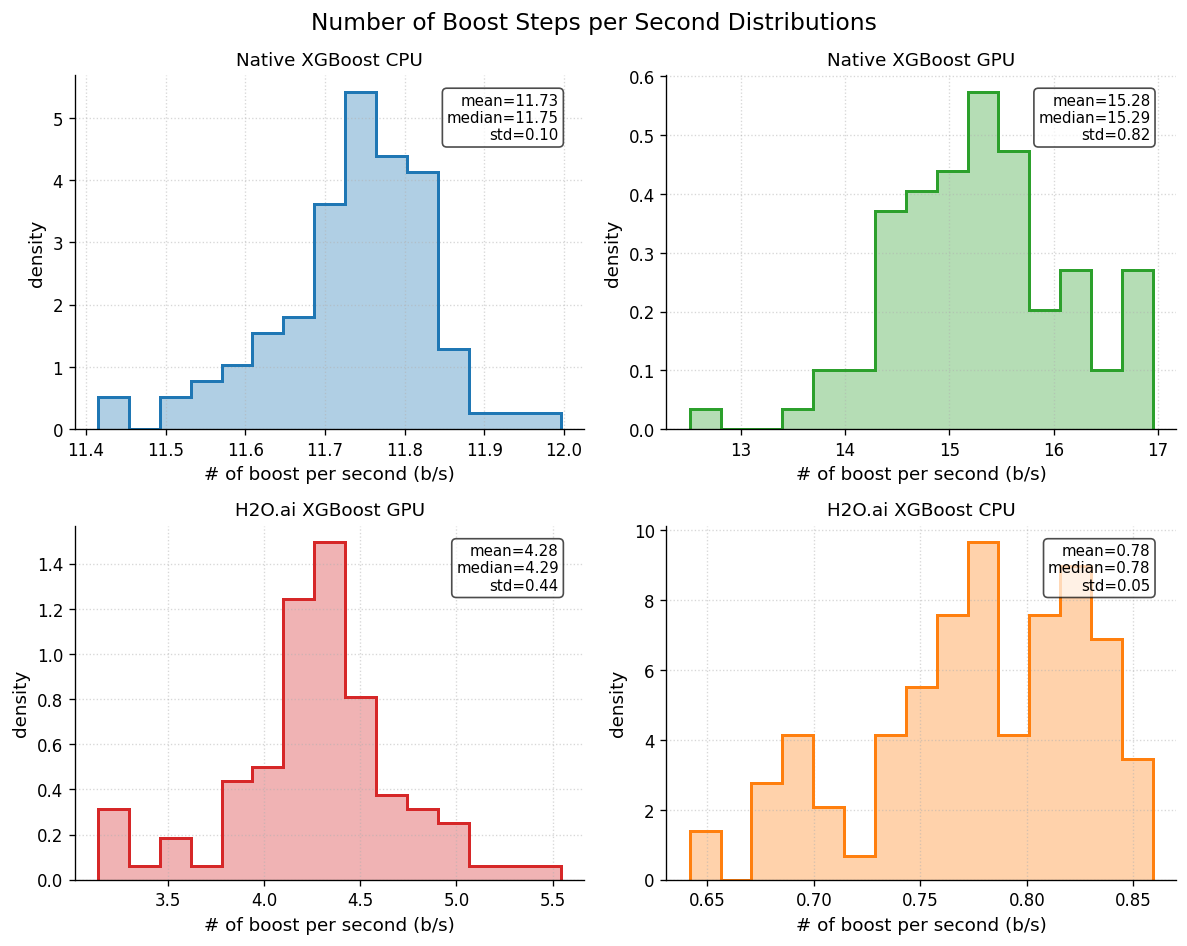

In [123]:
plot_hist_grid(df_all, "n_boost_per_sec", bins=15,
                 title="Number of Boost Steps per Second Distributions")